In [1]:
# Resolve paths from root project directory

import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from data_tools import load_parsed_data

In [36]:
# Plot styles
import matplotlib.style as style
style.use('seaborn-poster')
style.use('ggplot')

In [182]:
tweet_df = load_parsed_data('../data/14-nov/parsed_tweets.json')
tweet_df.shape
tweet_df.columns

Loading 3100350 json lines
100000 lines in ../data/14-nov/parsed_tweets.json processed (3.6080479621887207 sec)
200000 lines in ../data/14-nov/parsed_tweets.json processed (3.7347159385681152 sec)
300000 lines in ../data/14-nov/parsed_tweets.json processed (3.449086904525757 sec)


KeyboardInterrupt: 

In [42]:
retweet_df = load_parsed_data('../data/14-nov/parsed_retweets.json')
retweet_df.shape
retweet_df.columns

Loading 13023076 json lines
100000 lines in ../data/14-nov/parsed_retweets.json processed (0.42363476753234863 sec)
200000 lines in ../data/14-nov/parsed_retweets.json processed (0.36980223655700684 sec)
300000 lines in ../data/14-nov/parsed_retweets.json processed (0.5042660236358643 sec)
400000 lines in ../data/14-nov/parsed_retweets.json processed (0.3491330146789551 sec)
500000 lines in ../data/14-nov/parsed_retweets.json processed (0.34934186935424805 sec)
600000 lines in ../data/14-nov/parsed_retweets.json processed (0.3912162780761719 sec)
700000 lines in ../data/14-nov/parsed_retweets.json processed (0.3248410224914551 sec)
800000 lines in ../data/14-nov/parsed_retweets.json processed (0.3236560821533203 sec)
900000 lines in ../data/14-nov/parsed_retweets.json processed (0.44131898880004883 sec)
1000000 lines in ../data/14-nov/parsed_retweets.json processed (0.32364392280578613 sec)
1100000 lines in ../data/14-nov/parsed_retweets.json processed (0.35892796516418457 sec)
1200000

Index(['retweeted', 'timestamp', 'retweetedFrom_user', 'user'], dtype='object')

In [43]:
user_df = load_parsed_data('../data/14-nov/parsed_users.json')
user_df.shape
user_df.columns

Loading 1600543 json lines
100000 lines in ../data/14-nov/parsed_users.json processed (0.9237151145935059 sec)
200000 lines in ../data/14-nov/parsed_users.json processed (0.918828010559082 sec)
300000 lines in ../data/14-nov/parsed_users.json processed (0.9037518501281738 sec)
400000 lines in ../data/14-nov/parsed_users.json processed (1.0109500885009766 sec)
500000 lines in ../data/14-nov/parsed_users.json processed (0.8027448654174805 sec)
600000 lines in ../data/14-nov/parsed_users.json processed (0.8734869956970215 sec)
700000 lines in ../data/14-nov/parsed_users.json processed (0.8276817798614502 sec)
800000 lines in ../data/14-nov/parsed_users.json processed (0.731130838394165 sec)
900000 lines in ../data/14-nov/parsed_users.json processed (0.7257790565490723 sec)
1000000 lines in ../data/14-nov/parsed_users.json processed (0.7622711658477783 sec)
1100000 lines in ../data/14-nov/parsed_users.json processed (0.8310251235961914 sec)
1200000 lines in ../data/14-nov/parsed_users.json

Index(['protected', 'followed_cnts', 'name', 'handle', 'description',
       'verified', 'friends_count', 'followers_count', 'location', 'url',
       'created_at', 'friends'],
      dtype='object')

# 1) Basic stats

- \# of tweets
- \# of retweets
- \# of accounts
- Stream from when to when (using retweets)
- Volume per day

In [105]:
print("--Length--")
print("Number of tweets: {:,}".format(len(tweet_df.index)))
print("Number of retweets: {:,}".format(len(retweet_df.index)))
print("Number of accounts: {:,}".format(len(user_df.index)))
print()
print("--Coverage--")
print("Earliest tweet: {}, last tweet: {}".format(tweet_df.timestamp.min(), tweet_df.timestamp.max()))
print("Earliest retweet: {}, last retweet: {}".format(retweet_df.timestamp.min(), retweet_df.timestamp.max()))

--Size--
Number of tweets: 403,543
Number of retweets: 13,023,076
Number of accounts: 1,600,543

--Coverage--
Earliest tweet: 2020-10-29T11:15:00Z, last tweet: 2020-11-12T16:55:39Z
Earliest retweet: 2020-10-23T16:59:58Z, last retweet: 2020-11-15T00:44:22Z


# 2) Retweet count by hour for our data


In [148]:
def group_df_by_hour(df, column='timestamp'):
    grouped_by_hour = (pd.to_datetime(df[column])
        .dt.floor('H')
        .value_counts()
        .rename_axis('date')
        .reset_index(name='count')).sort_values(by=['date'])
    # grouped_by_hour.set_index('date')
    return grouped_by_hour.set_index('date')

retweet_df_by_hour = group_df_by_hour(retweet_df)
len(retweet_df_by_hour.index)

517

In [149]:
retweet_df_by_hour[:10]

,count
date,
2020-10-23 16:00:00+00:00,2
2020-10-23 17:00:00+00:00,1131
2020-10-23 18:00:00+00:00,2145
2020-10-23 19:00:00+00:00,917
2020-10-23 20:00:00+00:00,1533
2020-10-23 21:00:00+00:00,1365
2020-10-23 22:00:00+00:00,1933
2020-10-23 23:00:00+00:00,1592
2020-10-24 00:00:00+00:00,973


In [174]:
rolling_average = retweet_df_by_hour.rolling('12h').mean()

rolling_average[:10]

,count
date,
2020-10-23 16:00:00+00:00,2.000000
2020-10-23 17:00:00+00:00,566.500000
2020-10-23 18:00:00+00:00,1092.666667
2020-10-23 19:00:00+00:00,1048.750000
2020-10-23 20:00:00+00:00,1145.600000
2020-10-23 21:00:00+00:00,1182.166667
2020-10-23 22:00:00+00:00,1289.428571
2020-10-23 23:00:00+00:00,1327.250000
2020-10-24 00:00:00+00:00,1287.888889


Text(0.5, 1.0, 'Retweet Coverage (total=13,023,076)')

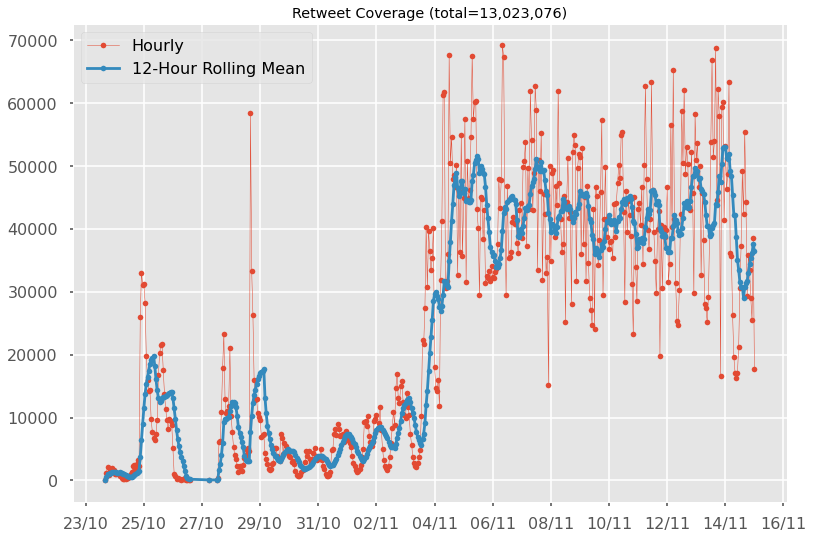

In [177]:
fig, ax = plt.subplots()   


ax.plot(retweet_df_by_hour["count"], label="Hourly", marker='.', linestyle='-', linewidth=0.5)
ax.plot(rolling_average["count"], marker='.', linestyle='-', label='12-Hour Rolling Mean')

ax.legend()

ax.xaxis.set_major_formatter(mdates.DateFormatter('%d/%m'))
# mdates.HourLocator(interval = 12)
ax.xaxis.set_major_locator(mdates.DayLocator(interval = 2))


ax.set_title('Retweet Coverage (total={:,})'.format(len(retweet_df.index)))

# 3) Analyzing crawled terms among streamed tweets

In [181]:
# To-do: replace with import
#from data_tools import load_crawled_terms
def load_crawled_terms(filename):
  crawled_terms = []
  with open(filename) as r:
    for line in r:
      crawled_terms.append(line.replace("\n", ""))
  
  return crawled_terms

crawled_terms = load_crawled_terms("../data/keywords-3nov.txt")
crawled_terms

['#ballotfraud',
 '#ballotharvesting',
 '#ballotvoterfraud',
 '#cheatingdemocrats',
 '#democratvoterfraud',
 '#discardedballots',
 '#electionfraud',
 '#electioninterference',
 '#electiontampering',
 '#gopvoterfraud',
 '#hackedvotingmachines',
 '#ilhanomarballotharvesting',
 '#ilhanomarvoterfraud',
 '#mailinvoterfraud',
 '#nomailinvoting',
 '#stopgopvoterfraud',
 '#stopthesteal',
 '#stopvoterfraud',
 '#votebymailfraud',
 '#voterfraud',
 '#voterfraudisreal',
 'Destroyed ballots',
 'Discarded ballots',
 'Election fraud',
 'Election interference',
 'Election tampering',
 'Hacked voting machine',
 'Pre-filled ballot',
 'Stolen ballots',
 'ballot fraud',
 'ballot harvesting',
 'cheating democrats',
 'democrats cheat',
 'harvest ballot',
 'vote by mail fraud',
 'voter fraud']